# AMGeO 2.0: Crafting an API for Geospace Data Scientists

<img src='./static/AMGeOLogo.svg'/>

## Authors

In [30]:
Author1 = {
    "name": "Willem Mirkovich",
    "affiliation": "University of Colorado Boulder, Smead Aerospace Engineering Sciences",
    "email": "willem.mirkovich@colorado.edu",
    "orcid": "0000-0003-0955-8281"
}
Author2 = {
    "name": "Tomoko Matsuo",
    "affiliation": "University of Colorado Boulder, Smead Aerospace Engineering Sciences",
    "email": "tomoko.matsuo@colorado.edu",
    "orcid": "0000-0002-2754-1224" 
}
Author3 = {
    "name": "Liam Kilcommons",
    "affiliation": "University of Colorado Boulder, Smead Aerospace Engineering Sciences",
    "email": "Liam.Kilcommons@colorado.edu",
    "orcid": "0000-0002-4980-3045"
}

## Table Of Contents

TODO: once final notebook is ready

## Technical Contributions

- Introduces geosapce researchers to AMGeO's new API
- Showcases power of using Xarray to enable research of multidimensional datasets
- Gives examples of using the API with various other Python packages, including
    - Numpy
    - Matplotlib
    - Apexpy
    - Cartopy

## Methodology

    The Assimilative Mapping of Geospace Observations (AMGeO) is a data science tool for the geospace science community that automates labor-intensive data acquisition and processing, combining observations from various sensors into assimilative maps of the high-latitude ionosphere. While AMGeO offers a highly configurable toolset, it currently requires both domain expertise and familiarity with Python to use it effectively for scientific research. 

    To remove hurdles for novice users and empower all AMGeO users, we have recently introduced a new Application Programming Interface (API) focused on enhanced user-experience, including better compatibility with Jupyter Notebooks, improved data manipulation with Xarray and more flexible data generation. This notebook will demonstrate the functionality offered by the new API and how to use AMGeO in conjunction with other popular Python research tools in order to accelerate geospace data science processes.

## Funding

AMGeO is supported by the NSF EarthCube grants ICER 1928403 to the University of Colorado Boulder, ICER 1928327 to the Virginia Tech, and ICER 1928358 to the Johns Hopkins University Applied Physics Laboratory.

## Keywords

In [31]:
keywords=["AMGeO", "Xarray", "Cartopy", ] # TODO: fill in

## Citation

TODO: zenodo link here, or just reference github repo

AMGeO Collaboration (2019), A Collaborative Data Science Platform for the Geospace Community: Assimilative Mapping of Geospace Observations (AMGeO) v1.0.0, http://doi.org/10.5281/zenodo.3564914.

## Work In Progress

While this notebook is in a complete state, these are some notable additions that would be nice to add:

- Apexpy example of converting to base vectors
- Cartopy example of time-series 
- Cartopy example of vector plots

## Suggested next steps

Please get started with AMGeO [here](https://amgeo.colorado.edu/), we would love any feedback to continue improving our software.

And, if interested, please reach out to the authors about joining our upcoming Hackathon with Earthcube!

## Acknowledgements

We would like to thank our data providers:

- [SuperMAG](https://supermag.jhuapl.edu/)
- [SuperDARN](http://vt.superdarn.org/tiki-index.php)
- [AMPERE](http://ampere.jhuapl.edu/)
- [NASA SPDF](https://spdf.gsfc.nasa.gov/)

# Setup

## Library Imports

Below are the necessary libraries needed to run this notebook: 

- Python 3.8
- AMGeO 2.0.2 (comes with Matplotlib, Numpy, Xarray)
- Apexpy 1.0.1
- Cartopy 0.20.2

In [32]:
# Ignore uunecessary warnings from AMGeO dependencies
import warnings
warnings.filterwarnings('ignore')

In [33]:
# AMGeO's API class
# NOTE: this will be imported later for readability

# python's datetime module
from datetime import datetime, date

# matplotlib tools
import matplotlib.pyplot as plt
import numpy as np

# cartopy
import cartopy.crs as crs

# apexpy
from apexpy import Apex

# AMGeO's new API

[AMGeO's 2.0 Release]() comes with a fleshed out Application Programming Interface (API) for easier
generation/loading of Assimilative Maps of GeoSapce Observations (AMGeO).

The development of this API had two main goals in mind:

1. Simple *and* functional classes/objects to generate/manipulate/load AMGeO's main data product

2. Interopability with various Python scientifict packages, such as 
Numpy, Xarray, Scipy, as well as popular geospatial packages like
ApexPy, CartoPy

## Installing AMGeO

TODO: do info thing here for notebooks

<mark>NOTE:</mark> not not necessary for this notebook

## Importing the API

To import AMGeO's Python API, execute the below. 

<mark>NOTE:</mark> upon import, if you have not configured AMGeO with your API key, SuperMAG username or AMPERE username, this will be asked here (with instructions on how to get each).

TODO: info => fill in test here, or mock this out... tbd

In [34]:
from AMGeO.api import AMGeOApi

## Creating an AMGeO API instance

Here, we can create an AMGeO API instance, and get various details as to a default API instance

In [35]:
api = AMGeOApi()
api

AMGeO API instance
current configuration: default
current output directory: /workspaces/AMGeO-dev/Earthcube-Meeting-2022/amgeo_out

### Setting our output directory for AMGeO data

When running AMGeO, a local file system directory will be selected to store your assimilative maps. By default, AMGeo will use ```~/amgeo_v2_ouptput```

In [36]:
api.get_output_dir()

'/workspaces/AMGeO-dev/Earthcube-Meeting-2022/amgeo_out'

But, if you want to specify another directory, you can set this in the API instance using ```set_output_dir```

In [37]:
api.set_output_dir('./amgeo_out')

In [38]:
api.get_output_dir()

'/workspaces/AMGeO-dev/Earthcube-Meeting-2022/amgeo_out'

## Creating an AMGeO Controller

To generate assimilative maps, you will have to load specific settings from AMGeO. Conveniently, AMGeO's new API allows for a simple way to load AMGeO's default settings using a ```controller```.

To create a ```controller``` instance, you can call ```get_controller``` on an API instance

In [39]:
controller = api.get_controller()
controller

Default AMGeO Controller
Creates Assimilative Maps using SuperMAG and SuperDARN observations
Does not predict magnetic potential nor field-aligned current

As observerd, calling ```get_controller``` returns an ```Default AMGeO Controller```, that is able to both create and load assimilative maps using AMGeO's default settings. 

## Generating AMGeO maps

<img src="./static/AMGeOElectricPotentialMap.png" width="500px" height="500px">

Now that we have a ```controller``` instance, we can create assimilative maps by calling the ```generate``` method on our ```controller```. This method takes both a hemisphere and a date argument. For example, if we wanted to generate maps for dates:

- January 6th, 2013 16:30:00
- January 6th, 2013 17:30:00
- February 6th, 2013 12:30:00
- February 6th, 2013 13:30:00

and on the Northern hemisphere, we can call ```generate``` with ...

In [40]:
dts = [
    datetime(2013, 1, 6, 16, 30, 0), # January 6th, 2013 16:30:00
    datetime(2013, 1, 6, 17, 30, 0), # January 6th, 2013 17:30:00
    datetime(2013, 2, 6, 12, 30, 0), # February 6th, 2013 12:30:00
    datetime(2013, 2, 6, 13, 30, 0) # February 6th, 2013 13:30:00
]
# hemisphere
h = 'N'

In [41]:
controller.generate(dts, h)

Data requested for 2 day(s)


100%|██████████| 2/2 [00:00<00:00, 24.92it/s]

Request recieved for 2013-1-6 N
No new datetimes to complete for 2013-01-06 16:30:00
2013-1-6 N complete
Request recieved for 2013-2-6 N
No new datetimes to complete for 2013-02-06 12:30:00
2013-2-6 N complete
AMGeO complete


Once complete, we will be able to see generated AMGeO maps for each datetime.

```controller.generate``` supports multiple different ways of generating maps based on dates/datetimes:

1. A single datetime

    Will generate data for a specific date and time 
    ```python
    controller.generate(datetime(YYYY, MM, DD, hh, mm, ss), 'N' | 'S')
    ```
    
2. A single date

    Will generate data for 5 min slices over the entire date provided
    Ex: date(2013, 5, 5) => datetime(2013, 5, 5, 0, 2, 30), datetime(2013, 5, 5, 0, 7, 30), ...
    ```python
    controller.generate(date(YYYY, MMMM, DD), 'N' | 'S')
    ```
3. A list of dates/datetimes

    This will handle each element within the list on a case by case basis, in a bulk job
    ```python
    controller.generate([
        datetime(YYYY, MM, DD, hh, mm, ss),
        date(YYYY, MM, DD),
        ...
    ], 'N' | 'S')
    ```

## Browsing AMGeO maps

Once we have generated AMGeO maps, we might be interested in browsing what maps we have available.

To do this, the ```controller``` has a ```browse``` method that can be used in two ways.

1. Browse based on a hemisphere which dates have AMGeO maps already generated.

    ```python
    controller.browse('N' | 'S')
    ```

In [42]:
controller.browse('N')

[datetime.date(2013, 1, 6), datetime.date(2013, 2, 6)]

2. Specify a date and hemisphere for specific times that AMGeO has generated maps for

    ```python
    controller.browse(date(YYYY, MM, DD), 'N' | 'S')
    ```

In [43]:
controller.browse(date(2013, 2, 6), 'N')

[datetime.datetime(2013, 2, 6, 12, 30), datetime.datetime(2013, 2, 6, 13, 30)]

## Loading AMGeO maps

The last and most important piece of AMGeO's new API is the ability to load AMGeO maps into [Xarray datasets](http://xarray.pydata.org/en/stable/generated/xarray.Dataset.html), with no work needed other than calling ```controller.load```

```load``` supports the same modularity as ```generate```, to allow for you load various dates/datetimes on a given hemisphere into one dataset.

1. A single datetime

    Will load the specific date into a dataset
    ```python
    controller.load(datetime(YYYY, MM, DD, hh, mm, ss), 'N' | 'S')
    ```

In [44]:
controller.load(datetime(2013, 1, 6, 16, 30, 0), 'N')

<xarray.Dataset>
Dimensions:         (time: 1, lat: 24, lon: 37)
Coordinates:
  * time            (time) datetime64[ns] 2013-01-06T16:30:00
  * lat             (lat) float64 88.33 86.67 85.0 83.33 ... 53.33 51.67 50.0
  * lon             (lon) float64 0.0 10.0 20.0 30.0 ... 330.0 340.0 350.0 360.0
Data variables:
    E_ph            (time, lat, lon) float64 -0.01019 -0.009465 ... -3.187e-06
    E_th            (time, lat, lon) float64 0.027 0.02508 ... -0.000415
    cond_hall       (time, lat, lon) float64 4.0 4.0 4.0 4.0 ... 4.0 4.0 4.0 4.0
    cond_ped        (time, lat, lon) float64 4.0 4.0 4.0 4.0 ... 4.0 4.0 4.0 4.0
    epot            (time, lat, lon) float64 -6.755e+03 -6.42e+03 ... 493.9
    int_joule_heat  (time) float64 9.623
    joule_heat      (time, lat, lon) float64 3.331 2.874 ... 0.0005697 0.000689
    v_ph            (time, lat, lon) float64 459.4 426.8 ... -0.8729 -8.498
    v_th            (time, lat, lon) float64 173.4 161.0 ... -7.678 0.06526
Attributes:
    description:  AMGeO Assimilative Maps
    version:      v2_beta
    hemisphere:   N

2. A single date

    Will load all maps availabe from a date
    ```python
    controller.load(date(YYYY, MM, DD), 'N' | 'S')
    ```

In [45]:
controller.load(date(2013, 1, 6), 'N')

<xarray.Dataset>
Dimensions:         (time: 2, lat: 24, lon: 37)
Coordinates:
  * time            (time) datetime64[ns] 2013-01-06T16:30:00 2013-01-06T17:3...
  * lat             (lat) float64 88.33 86.67 85.0 83.33 ... 53.33 51.67 50.0
  * lon             (lon) float64 0.0 10.0 20.0 30.0 ... 330.0 340.0 350.0 360.0
Data variables:
    E_ph            (time, lat, lon) float64 -0.01019 -0.009465 ... -3.323e-06
    E_th            (time, lat, lon) float64 0.027 0.02508 ... -0.0001662
    cond_hall       (time, lat, lon) float64 4.0 4.0 4.0 4.0 ... 4.0 4.0 4.0 4.0
    cond_ped        (time, lat, lon) float64 4.0 4.0 4.0 4.0 ... 4.0 4.0 4.0 4.0
    epot            (time, lat, lon) float64 -6.755e+03 -6.42e+03 ... 196.5
    int_joule_heat  (time) float64 9.623 27.86
    joule_heat      (time, lat, lon) float64 3.331 2.874 ... 8.709e-05 0.0001106
    v_ph            (time, lat, lon) float64 459.4 426.8 ... -0.3691 -3.404
    v_th            (time, lat, lon) float64 173.4 161.0 ... -2.999 0.06805
Attributes:
    description:  AMGeO Assimilative Maps
    version:      v2_beta
    hemisphere:   N

3. A list of dates/datetimes

    Will load each date/datetime respectively from the list. NOTE: you can load from multiple dates into one dataset
    ```python
    controller.load([
        datetime(YYYY, MM, DD, hh, mm, ss),
        date(YYYY, MM, DD),
        ...
    ], 'N' | 'S')
    ```

In [46]:
controller.load([
    date(2013, 1, 6),
    datetime(2013, 2, 6, 12, 30, 0)
], 'N')

<xarray.Dataset>
Dimensions:         (time: 3, lat: 24, lon: 37)
Coordinates:
  * time            (time) datetime64[ns] 2013-01-06T16:30:00 ... 2013-02-06T...
  * lat             (lat) float64 88.33 86.67 85.0 83.33 ... 53.33 51.67 50.0
  * lon             (lon) float64 0.0 10.0 20.0 30.0 ... 330.0 340.0 350.0 360.0
Data variables:
    E_ph            (time, lat, lon) float64 -0.01019 -0.009465 ... 2.164e-06
    E_th            (time, lat, lon) float64 0.027 0.02508 ... -0.0003038
    cond_hall       (time, lat, lon) float64 4.0 4.0 4.0 4.0 ... 4.0 4.0 4.0 4.0
    cond_ped        (time, lat, lon) float64 4.0 4.0 4.0 4.0 ... 4.0 4.0 4.0 4.0
    epot            (time, lat, lon) float64 -6.755e+03 -6.42e+03 ... 343.2
    int_joule_heat  (time) float64 9.623 27.86 5.876
    joule_heat      (time, lat, lon) float64 3.331 2.874 ... 0.0003162 0.0003692
    v_ph            (time, lat, lon) float64 459.4 426.8 ... -0.6552 -6.221
    v_th            (time, lat, lon) float64 173.4 161.0 ... -5.72 -0.04431
Attributes:
    description:  AMGeO Assimilative Maps
    version:      v2_beta
    hemisphere:   N

As you may have noticed, it is really easy to plug dates from the ```browse``` method into the ```load``` method

In [47]:
hemi = 'N'
dates = controller.browse(hemi)
controller.load(dates, hemi)

<xarray.Dataset>
Dimensions:         (time: 4, lat: 24, lon: 37)
Coordinates:
  * time            (time) datetime64[ns] 2013-01-06T16:30:00 ... 2013-02-06T...
  * lat             (lat) float64 88.33 86.67 85.0 83.33 ... 53.33 51.67 50.0
  * lon             (lon) float64 0.0 10.0 20.0 30.0 ... 330.0 340.0 350.0 360.0
Data variables:
    E_ph            (time, lat, lon) float64 -0.01019 -0.009465 ... 3.771e-07
    E_th            (time, lat, lon) float64 0.027 0.02508 ... -0.0003171
    cond_hall       (time, lat, lon) float64 4.0 4.0 4.0 4.0 ... 4.0 4.0 4.0 4.0
    cond_ped        (time, lat, lon) float64 4.0 4.0 4.0 4.0 ... 4.0 4.0 4.0 4.0
    epot            (time, lat, lon) float64 -6.755e+03 -6.42e+03 ... 363.5
    int_joule_heat  (time) float64 9.623 27.86 5.876 6.996
    joule_heat      (time, lat, lon) float64 3.331 2.874 ... 0.0003407 0.0004021
    v_ph            (time, lat, lon) float64 459.4 426.8 ... -0.6923 -6.492
    v_th            (time, lat, lon) float64 173.4 161.0 ... -5.936 -0.007721
Attributes:
    description:  AMGeO Assimilative Maps
    version:      v2_beta
    hemisphere:   N

# AMGeO's Xarray Datasets

As stated, AMGeO uses Xarray to load Assimilative Maps into a sensible data structure for 
data wrangling and processing. 

This section is to go over some of the neat features that come with interacting with AMGeO maps with Xarray datasets.

Below is a diagram of the organization of an Xarray dataset with AMGeO maps

![AMGeO Xarray dataset](./static/AMGeOXarrayDataset.png)

Lets load all of our data generated so far into a Dataset for us to experiment with

In [48]:
ds = controller.load(controller.browse('N'), 'N')
ds

<xarray.Dataset>
Dimensions:         (time: 4, lat: 24, lon: 37)
Coordinates:
  * time            (time) datetime64[ns] 2013-01-06T16:30:00 ... 2013-02-06T...
  * lat             (lat) float64 88.33 86.67 85.0 83.33 ... 53.33 51.67 50.0
  * lon             (lon) float64 0.0 10.0 20.0 30.0 ... 330.0 340.0 350.0 360.0
Data variables:
    E_ph            (time, lat, lon) float64 -0.01019 -0.009465 ... 3.771e-07
    E_th            (time, lat, lon) float64 0.027 0.02508 ... -0.0003171
    cond_hall       (time, lat, lon) float64 4.0 4.0 4.0 4.0 ... 4.0 4.0 4.0 4.0
    cond_ped        (time, lat, lon) float64 4.0 4.0 4.0 4.0 ... 4.0 4.0 4.0 4.0
    epot            (time, lat, lon) float64 -6.755e+03 -6.42e+03 ... 363.5
    int_joule_heat  (time) float64 9.623 27.86 5.876 6.996
    joule_heat      (time, lat, lon) float64 3.331 2.874 ... 0.0003407 0.0004021
    v_ph            (time, lat, lon) float64 459.4 426.8 ... -0.6923 -6.492
    v_th            (time, lat, lon) float64 173.4 161.0 ... -5.936 -0.007721
Attributes:
    description:  AMGeO Assimilative Maps
    version:      v2_beta
    hemisphere:   N

## Data Variables

Once you have loaded a dataset, you are able to access various ```data variables``` that exist on it. These are just ways to differentiate between different kinds of data you might be interested in. When accessing a ```data variable```, you will get a ```DataArray``` in return.

In [49]:
# Get Hall Conductance
ds['cond_hall']

<xarray.DataArray 'cond_hall' (time: 4, lat: 24, lon: 37)>
array([[[4., 4., 4., ..., 4., 4., 4.],
        [4., 4., 4., ..., 4., 4., 4.],
        [4., 4., 4., ..., 4., 4., 4.],
        ...,
        [4., 4., 4., ..., 4., 4., 4.],
        [4., 4., 4., ..., 4., 4., 4.],
        [4., 4., 4., ..., 4., 4., 4.]],

       [[4., 4., 4., ..., 4., 4., 4.],
        [4., 4., 4., ..., 4., 4., 4.],
        [4., 4., 4., ..., 4., 4., 4.],
        ...,
        [4., 4., 4., ..., 4., 4., 4.],
        [4., 4., 4., ..., 4., 4., 4.],
        [4., 4., 4., ..., 4., 4., 4.]],

       [[4., 4., 4., ..., 4., 4., 4.],
        [4., 4., 4., ..., 4., 4., 4.],
        [4., 4., 4., ..., 4., 4., 4.],
        ...,
        [4., 4., 4., ..., 4., 4., 4.],
        [4., 4., 4., ..., 4., 4., 4.],
        [4., 4., 4., ..., 4., 4., 4.]],

       [[4., 4., 4., ..., 4., 4., 4.],
        [4., 4., 4., ..., 4., 4., 4.],
        [4., 4., 4., ..., 4., 4., 4.],
        ...,
        [4., 4., 4., ..., 4., 4., 4.],
        [4., 4., 4., ..., 4., 4., 4.],
        [4., 4., 4., ..., 4., 4., 4.]]])
Coordinates:
  * time     (time) datetime64[ns] 2013-01-06T16:30:00 ... 2013-02-06T13:30:00
  * lat      (lat) float64 88.33 86.67 85.0 83.33 ... 55.0 53.33 51.67 50.0
  * lon      (lon) float64 0.0 10.0 20.0 30.0 40.0 ... 330.0 340.0 350.0 360.0
Attributes:
    description:  cond_hall
    longname:     Ovation Pyme Hall Conductance
    shortname:    cond_hall
    units:        mho

## Coordinates/Dimensions

One of the main advantages to using Xarray for managing scientific data is how it is able to manage multi-dimensional datasets. Traditionally, accessing information regarding the dimensions of your arrays must be made explicit in comments or stored in auxillary data structures. With ```DataArray```, it is all in one place

In [50]:
epots = ds['epot']
epots.dims

('time', 'lat', 'lon')

As seen above, the first dimension of the 3 dimensional array ```epots``` is ```time```, followed by ```latitude``` and ```longitude``` respectively. 

Another cool part of Xarray is ```coords```, that act as coordinates to your dimensions for specific elements

In [51]:
epots.coords

Coordinates:
  * time     (time) datetime64[ns] 2013-01-06T16:30:00 ... 2013-02-06T13:30:00
  * lat      (lat) float64 88.33 86.67 85.0 83.33 ... 55.0 53.33 51.67 50.0
  * lon      (lon) float64 0.0 10.0 20.0 30.0 40.0 ... 330.0 340.0 350.0 360.0

By accessing the ```coords``` property, we can see the types and data stored in the coordinates for a specific DataArray. These are also accessible on a per element basis, with the ability to see a specific coordinate

In [52]:
epots[0].time

<xarray.DataArray 'time' ()>
array('2013-01-06T16:30:00.000000000', dtype='datetime64[ns]')
Coordinates:
    time     datetime64[ns] 2013-01-06T16:30:00

In [53]:
# dims => [time, lat, lon]
potential = epots[0][12][16]
potential.lat

<xarray.DataArray 'lat' ()>
array(68.33319991)
Coordinates:
    time     datetime64[ns] 2013-01-06T16:30:00
    lat      float64 68.33
    lon      float64 160.0
Attributes:
    longname:   Modified Magnetic Apex Latitudes
    shortname:  lats
    units:      degrees

## Dataset Metadata

In addition to robust dimension/coordinate information, you can also attach metadata to your DataArrays. AMGeO does this on multiple properties, and they are accessible by calling the ```attrs``` property

In [54]:
# get DataSet metadata
ds.attrs

{'description': 'AMGeO Assimilative Maps',
 'version': 'v2_beta',
 'hemisphere': 'N'}

In [55]:
# get DataVariable metadata
ds['joule_heat'].attrs

{'description': 'joule_heat',
 'longname': 'Joule Heating (E-field^2*Pedersen)',
 'shortname': 'joule_heat',
 'units': 'mW/m^2'}

In [56]:
# get latitude attributes
ds['joule_heat'][0].lat.attrs

{'longname': 'Modified Magnetic Apex Latitudes',
 'shortname': 'lats',
 'units': 'degrees'}

# Compatability with Matplotlib

Xarray DataArrays also make quick plotting much easier, with coordinates and metadata accessible from the same data structure

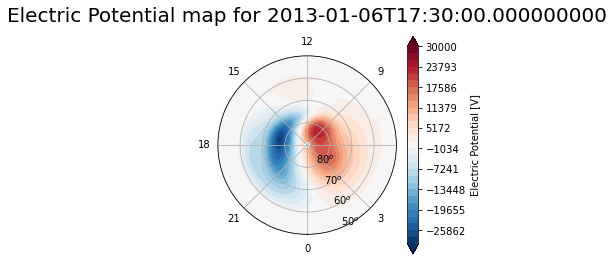

In [57]:

def polar2dial(ax):
    """
    Turns a matplotlib axes polar plot into a dial plot
    """
    #Rotate the plot so that noon is at the top and midnight
    #is at the bottom, and fix the labels so radial direction
    #is latitude and azimuthal direction is local time in hours
    ax.set_theta_zero_location('S')
    theta_label_values = np.array([0.,3.,6.,9.,12.,15.,18.,21.])*180./12
    theta_labels = ['%d' % (int(th/180.*12)) for th in theta_label_values.flatten().tolist()]
    ax.set_thetagrids(theta_label_values,labels=theta_labels)

    r_label_values = 90.-np.array([80.,70.,60.,50.,40.])
    r_labels = [r'$%d^{o}$' % (int(90.-rv)) for rv in r_label_values.flatten().tolist()]
    ax.set_rgrids(r_label_values,labels=r_labels)
    ax.set_rlim([0.,40.])
    
def plot_epot_map(fig, lats, lons, epot):
    ax = fig.add_subplot(111, projection='polar')
    polar2dial(ax)
    
    # plotting
    r = 90.-lats
    th = np.radians(lons)
    v = 30000
    levels=np.linspace(-v,v,30)
    cb = ax.contourf(th,r,epot,levels=levels,cmap='RdBu_r', vmin=-v, vmax=v,extend='both')
    
    # metadata attributes accessible on a DataArray
    units = epot.attrs['units']
    description = epot.attrs['longname']
    
    fig.colorbar(cb,label=f'{description} [{units}]')
    return ax

fig = plt.figure(figsize=(4, 4))

# grab 24x37 grid of Electo-static potentials
epot = ds['epot'][1]
# grab the time for this grid
t = epot.time.values
# plot epots with correct lat/lon coords
ax = plot_epot_map(fig, epot.lat, epot.lon, epot)
ax.set_title('Electric Potential map for %s' % t, pad=15, size=20)
plt.show()

# Compatability with Numpy

Xarray has native support for quite a few Numpy compatable operations

Look [here](http://xarray.pydata.org/en/stable/user-guide/duckarrays.html) for a full list of support for Numpy

It is also possible to convert a `DataArray` to a `ndarray` with the `values` property

In [58]:
# convert from DataArray to Numpy Array
arr = ds['joule_heat'].values
type(arr)

numpy.ndarray

# Compatability with ApexPy

[ApexPy](https://pypi.org/project/apexpy/) is a fully fleshed out library for geospatial coordinate systems conversions such as Geodectice, Magnetic Local Time, and naturally Apex. 

AMGeO's latitude and longitude are in `Magnetic Apex Latitude` and `Magnetic Local Time`, respectively, which is simple enough to transform to other coordinate systems using this package. 

In [59]:
# first, create an apex_out instance

# for mlt, need specific date, so lets load up a dataset with a specific date in mine
dates = controller.browse('N')
dates[0]

datetime.date(2013, 1, 6)

In [60]:
d = dates[0]
ds = controller.load(d, 'N')

# from here, we can create an apex_out instance for coordinate conversion
apex_out = Apex(date=d)
apex_out

## AMGeO to Geodetic

For plots using the common mercator projection, Geodetic is what we will be looking for

In [61]:
# need to create 24x37 grid of lat & lons for conversion

lats, lons = np.zeros((24, 37)), np.zeros((24, 37))
for i in range(24):
    for j in range(37):
        lats[i][j] = ds.lat.values[i]
        lons[i][j] = ds.lon.values[j]
lats, lons = np.array(lats), np.array(lons)
lats.shape, lons.shape

((24, 37), (24, 37))

In [62]:
# get specific reference date for conversion (needed for mlt conversion)
dt = controller.browse(d, 'N')[0]

# now, can convert to geodetic, AMGeO uses a reference height of 110km (the nominal F layer)
geo_lat, geo_lon = apex_out.convert(lats, lons, 'mlt', 'geo', datetime=dt, height=110)
geo_lat.shape, geo_lon.shape

((24, 37), (24, 37))

# Compatability with Cartopy

[CartoPy]() is a popular python package that allows for plotting onto Geographic 
projections of the world.

AMGeO's API lends itself well to mapping its data easily to these plotting tools.

## Plotting AMGeO Electostatic Potential on Orthographic Projection

Using the convenient `geo_lat` and `geo_lon` values we just generated, we can use Cartopy's `PlatteCarree` transform to map these values onto an `Orthographic` projection. 

The `Orhtographic` projection will suit nicely for visualzing an AMGeO grid of electostatic potentials on the northern hemisphere, which will spread from the magnetic north pole.

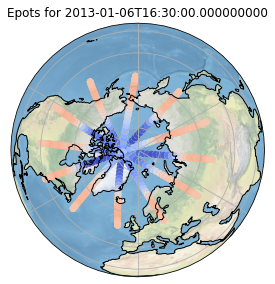

In [63]:
fig = plt.figure(figsize=[10, 5])

idx = 0

# Northern Hemisphere
ax = fig.add_subplot(1, 2, 1, projection=crs.Orthographic(0, 90))

ax.coastlines(zorder=3)
ax.stock_img()
ax.gridlines()

ax.scatter(geo_lon, geo_lat, c=ds.epot[idx], cmap='coolwarm', transform=crs.PlateCarree())

ax.set_title(f'Epots for {ds.time.values[idx]}')

plt.show()

# Pandas compatability

While not necessarily easier, since AMGeO works with multi-dimensional data, Xarray provides compatability with pandas. A more comprehensive overview can be found [here](http://xarray.pydata.org/en/stable/user-guide/pandas.html)

In [64]:
# convert AMGeO Xarray DataSet to Pandas DataFrame
ds.to_dataframe()

E_ph      E_th  cond_hall  cond_ped  \
time                lat       lon                                              
2013-01-06 16:30:00 88.333323 0.0   -0.010193  0.026999        4.0       4.0   
                              10.0  -0.009465  0.025080        4.0       4.0   
                              20.0  -0.007984  0.023245        4.0       4.0   
                              30.0  -0.005780  0.021667        4.0       4.0   
                              40.0  -0.003063  0.020531        4.0       4.0   
...                                       ...       ...        ...       ...   
2013-01-06 17:30:00 49.999754 320.0  0.000019 -0.000030        4.0       4.0   
                              330.0 -0.000059 -0.000013        4.0       4.0   
                              340.0  0.000009  0.000095        4.0       4.0   
                              350.0  0.000146 -0.000018        4.0       4.0   
                              360.0 -0.000003 -0.000166        4.0       4.0   

                                            epot  int_joule_heat  joule_heat  \
time                lat       lon                                              
2013-01-06 16:30:00 88.333323 0.0   -6755.328259        9.622610    3.331331   
                              10.0  -6419.514908        9.622610    2.874432   
                              20.0  -6113.721553        9.622610    2.416306   
                              30.0  -5862.900304        9.622610    2.011470   
                              40.0  -5688.033704        9.622610    1.723594   
...                                          ...             ...         ...   
2013-01-06 17:30:00 49.999754 320.0   313.325279       27.863884    0.000005   
                              330.0   313.296195       27.863884    0.000015   
                              340.0   338.207580       27.863884    0.000036   
                              350.0   267.731952       27.863884    0.000087   
                              360.0   196.514563       27.863884    0.000111   

                                           v_ph        v_th  
time                lat       lon                            
2013-01-06 16:30:00 88.333323 0.0    459.399493  173.436070  
                              10.0   426.756367  161.045790  
                              20.0   395.527306  135.848700  
                              30.0   368.673123   98.356825  
                              40.0   349.343274   52.117439  
...                                         ...         ...  
2013-01-06 17:30:00 49.999754 320.0   -0.614055   -0.385016  
                              330.0   -0.263458    1.207273  
                              340.0    1.939544   -0.191665  
                              350.0   -0.369148   -2.998625  
                              360.0   -3.403963    0.068048  

[1776 rows x 9 columns]

# Conclusion

This notebook showcases the standalone utility of AMGeO's new API, as well as the various ways it can
be used in tandem with other popular python packages. 

Please get started with AMGeO [here](https://amgeo.colorado.edu/), we would love any feedback to continue improving our software.

# References

TODO: include Xarray, numpy, the like

???